## Text Mining
- 비정형 텍스트 데이터에서 의미를 추출하는 작업
- 자연어처리 기술을 접목해서 최근에는 많이 활용되고 있다
    - (자연어처리 : 사람의 언어를 컴퓨터가 이해할 수 있도록 연구하는 학문)

## Text Mining Process
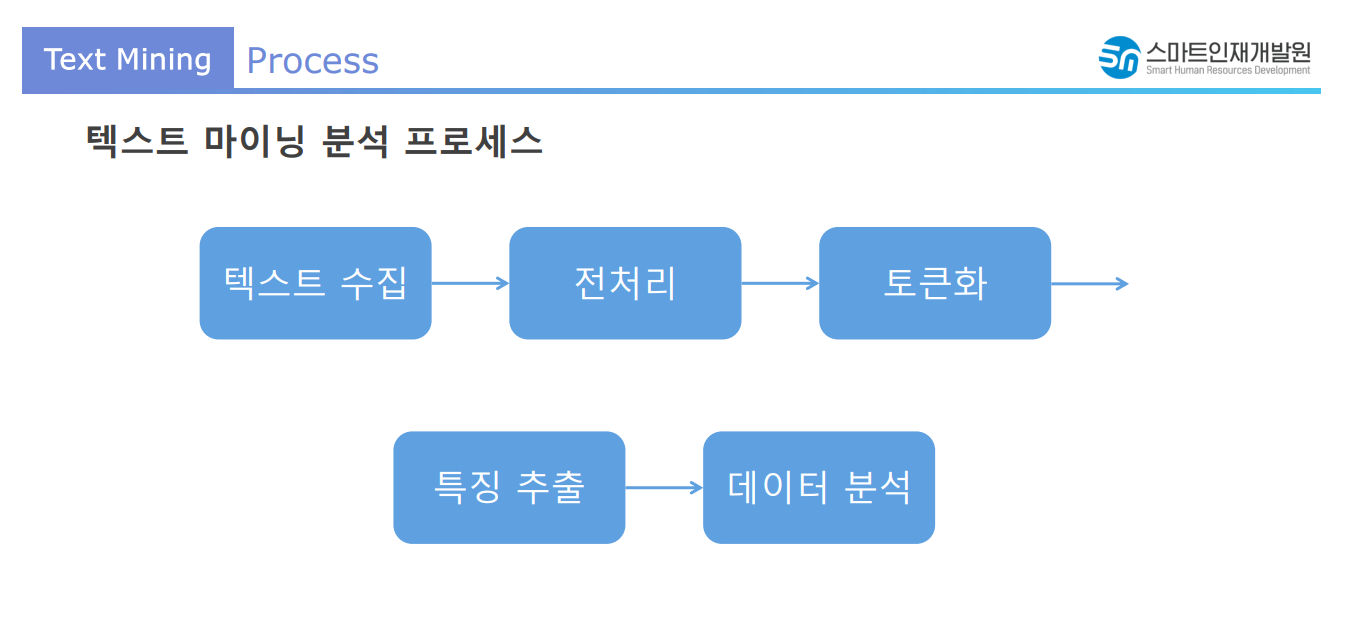

1. 전처리
    - 오타, 띄어쓰기 교정
    - 불필요한 단어제거(문장부호, 이모지, 불용어)
    - 형태소 분석(품사를 기준으로 명사, 형용사, 동사 등 ... 분리, 어근추출)


## 텍스트마이닝에서 활용할 분석종류
1. 단어빈도 분석
2. 감성분석 : 텍스트에서 사람의 감정/기분/의견/태도 등을 분석하는 작업
3. 연관성(유사도)분석 : text끼리 연관성이나 유사도를 비교하는 작업

## 1.단어 빈도 분석
- dataset : https://github.com/smilegate-ai/korean_unsmile_dataset

#### 데이터 수집 및 로딩
- 스마일게이트에서 실제 댓글을 모아서 정제한 데이터셋을 활용

In [64]:
# 현재 작업 디렉토리 및 폴더확인
import os
print(os.getcwd()) # 현재 작업폴더를 확인

# 작업디렉토리 내부 폴더 및 파일 확인
print(os.listdir(r'c:\Users\chxss\OneDrive\Desktop\AiSchool\python\ML')) # r로우스트링 : 글자그대로 인식
print(os.listdir(os.getcwd()))

c:\Users\chxss\OneDrive\Desktop\AiSchool\python\ML
['data', 'ex00_머신러닝_복습.ipynb', 'ex01_선형회귀(이론).ipynb', 'ex02_선형회귀(실습).ipynb', 'ex03_선형분류-직원이직예측.ipynb', 'ex04_텍스트마이닝_기초.ipynb', '한국어 혐오 단어 100.png']
['data', 'ex00_머신러닝_복습.ipynb', 'ex01_선형회귀(이론).ipynb', 'ex02_선형회귀(실습).ipynb', 'ex03_선형분류-직원이직예측.ipynb', 'ex04_텍스트마이닝_기초.ipynb', '한국어 혐오 단어 100.png']


In [65]:
import pandas as pd

In [66]:
# 훈련용, 평가용 데이터 로딩
train = pd.read_csv("./data/unsmile_train_v1.0.tsv", # 파일경로
                    delimiter="\t") # 구분자
test = pd.read_csv("./data/unsmile_train_v1.0.tsv", # 파일경로
                    delimiter='\t') # 구분자

In [67]:
# 데이터 확인
display(train.head(10))
display(test.head(10))

,문장,여성/가족,남성,성소수자,인종/국적,연령,지역,종교,기타 혐오,악플/욕설,clean,개인지칭
0,일안하는 시간은 쉬고싶어서 그런게 아닐까,0,0,0,0,0,0,0,0,0,1,0
1,아동성범죄와 페도버는 기록바 끊어져 영원히 고통 받는다. 무슬림 50퍼 근친이다. ...,0,0,0,0,0,0,1,0,0,0,0
2,루나 솔로앨범 나왔을 때부터 머모 기운 있었음 ㅇㅇ Keep o doin 진짜 띵...,0,0,0,0,0,0,0,0,0,1,0
3,홍팍에도 어버이연합인가 보내요 뭐 이런뎃글 있는데 이거 어버이연합측에 신고하면 그쪽...,0,0,0,0,0,0,0,0,0,1,0
4,아놔 왜 여기 댓들은 다 여자들이 김치녀라고 먼저 불렸다! 여자들은 더 심하게 그런...,1,0,0,0,0,0,0,0,0,0,0
5,고향가서 피방가면 동네 부럴 친구들이랑은 뭐 거르는 거 없이 이야기하니까 막 말하게...,0,0,0,0,0,0,0,0,0,1,0
6,예수 십새끼 개새끼 창녀아들 애비실종 가정교육 못받은 무뇌충 허언증 정신병자 사기꾼...,0,0,0,1,0,1,1,1,0,0,0
7,나이쳐먹고 피시방가는 놈들은 대가리에 똥만찬 놈들임,0,0,0,0,0,0,0,0,1,0,0
8,출산청같은 소리하네. 우리나라 계집들 다 의무적으로 군대보내면 해결될 일이다. 정신...,1,0,0,0,0,0,0,0,0,0,0
9,재능 ㅂㅅㅌㅊ노 ㅋㅋㅋㅋㅋ나도 합성배우고싶다이기,0,0,0,0,0,0,0,0,0,1,0


,문장,여성/가족,남성,성소수자,인종/국적,연령,지역,종교,기타 혐오,악플/욕설,clean,개인지칭
0,일안하는 시간은 쉬고싶어서 그런게 아닐까,0,0,0,0,0,0,0,0,0,1,0
1,아동성범죄와 페도버는 기록바 끊어져 영원히 고통 받는다. 무슬림 50퍼 근친이다. ...,0,0,0,0,0,0,1,0,0,0,0
2,루나 솔로앨범 나왔을 때부터 머모 기운 있었음 ㅇㅇ Keep o doin 진짜 띵...,0,0,0,0,0,0,0,0,0,1,0
3,홍팍에도 어버이연합인가 보내요 뭐 이런뎃글 있는데 이거 어버이연합측에 신고하면 그쪽...,0,0,0,0,0,0,0,0,0,1,0
4,아놔 왜 여기 댓들은 다 여자들이 김치녀라고 먼저 불렸다! 여자들은 더 심하게 그런...,1,0,0,0,0,0,0,0,0,0,0
5,고향가서 피방가면 동네 부럴 친구들이랑은 뭐 거르는 거 없이 이야기하니까 막 말하게...,0,0,0,0,0,0,0,0,0,1,0
6,예수 십새끼 개새끼 창녀아들 애비실종 가정교육 못받은 무뇌충 허언증 정신병자 사기꾼...,0,0,0,1,0,1,1,1,0,0,0
7,나이쳐먹고 피시방가는 놈들은 대가리에 똥만찬 놈들임,0,0,0,0,0,0,0,0,1,0,0
8,출산청같은 소리하네. 우리나라 계집들 다 의무적으로 군대보내면 해결될 일이다. 정신...,1,0,0,0,0,0,0,0,0,0,0
9,재능 ㅂㅅㅌㅊ노 ㅋㅋㅋㅋㅋ나도 합성배우고싶다이기,0,0,0,0,0,0,0,0,0,1,0


In [68]:
# 결측치
display(train.info())
display(test.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15005 entries, 0 to 15004
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   문장      15005 non-null  object
 1   여성/가족   15005 non-null  int64 
 2   남성      15005 non-null  int64 
 3   성소수자    15005 non-null  int64 
 4   인종/국적   15005 non-null  int64 
 5   연령      15005 non-null  int64 
 6   지역      15005 non-null  int64 
 7   종교      15005 non-null  int64 
 8   기타 혐오   15005 non-null  int64 
 9   악플/욕설   15005 non-null  int64 
 10  clean   15005 non-null  int64 
 11  개인지칭    15005 non-null  int64 
dtypes: int64(11), object(1)
memory usage: 1.4+ MB


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15005 entries, 0 to 15004
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   문장      15005 non-null  object
 1   여성/가족   15005 non-null  int64 
 2   남성      15005 non-null  int64 
 3   성소수자    15005 non-null  int64 
 4   인종/국적   15005 non-null  int64 
 5   연령      15005 non-null  int64 
 6   지역      15005 non-null  int64 
 7   종교      15005 non-null  int64 
 8   기타 혐오   15005 non-null  int64 
 9   악플/욕설   15005 non-null  int64 
 10  clean   15005 non-null  int64 
 11  개인지칭    15005 non-null  int64 
dtypes: int64(11), object(1)
memory usage: 1.4+ MB


None

#### 전체 데이터에서 단어들의 빈도를 측정해서 확인해보자

In [69]:
text_train = train['문장']
text_train

0                                   일안하는 시간은 쉬고싶어서 그런게 아닐까
1        아동성범죄와 페도버는 기록바 끊어져 영원히 고통 받는다. 무슬림 50퍼 근친이다. ...
2        루나 솔로앨범 나왔을 때부터 머모 기운 있었음 ㅇㅇ Keep o  doin 진짜 띵...
3        홍팍에도 어버이연합인가 보내요 뭐 이런뎃글 있는데 이거 어버이연합측에 신고하면 그쪽...
4        아놔 왜 여기 댓들은 다 여자들이 김치녀라고 먼저 불렸다! 여자들은 더 심하게 그런...
                               ...                        
15000                                            께롱께롱께롱!!!
15001                                갱상도가아니라 홍어지 개좃같은 홍어년들
15002                             말레이시아랑 인도네시아 여자 존나 못생겼던데
15003                                링크도 안박고 가서 글 쓰자고 선동하네
15004    멸치가 틀딱 짜증나서 트러블나면 조직적으로 좀스럽게 보복함ex: 수건찜유도탄, 틀한...
Name: 문장, Length: 15005, dtype: object

In [70]:
# !pip install nltk==3.8.1

In [71]:
# 띄어쓰기 중심으로 토큰화 : nltk 패키지 활용
from nltk import word_tokenize # 토큰화를 도와주는 함수
import nltk
nltk.download("punkt") # 문장부호 정보를 다운로드

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\chxss\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [72]:
word_tokenize(text_train.iloc[0])

['일안하는', '시간은', '쉬고싶어서', '그런게', '아닐까']

In [73]:
# 반복 프로세스의 정도를 시각화하는 도구
from tqdm import tqdm

In [74]:
# 쪼개진 단어들이 들어갈 리스트
words = []
for text in tqdm(text_train) :
    temp = word_tokenize(text) # 한 문장씩 토큰화
    words = words+temp

  0%|          | 0/15005 [00:00<?, ?it/s]

100%|██████████| 15005/15005 [00:07<00:00, 1999.28it/s]


In [75]:
words[:10]

['일안하는', '시간은', '쉬고싶어서', '그런게', '아닐까', '아동성범죄와', '페도버는', '기록바', '끊어져', '영원히']

In [76]:
# 단어빈도 세기
from collections import Counter

In [77]:
counter = Counter(words) # 같은 단어의 갯수를 세준다

In [78]:
words_most_100 = counter.most_common(100)
words_most_100

[('?', 3815),
 ('.', 3416),
 ('!', 2066),
 (',', 1174),
 ('..', 979),
 ('...', 905),
 ('다', 667),
 ('진짜', 543),
 ('왜', 540),
 ('ㅋㅋ', 435),
 ('존나', 376),
 ('그냥', 372),
 ('더', 368),
 ('ㅋㅋㅋ', 363),
 ('>', 296),
 (';', 271),
 ('좀', 265),
 ('이', 254),
 ('시발', 244),
 ('씨발', 244),
 ('그', 240),
 ('ㅋㅋㅋㅋ', 238),
 ('저', 238),
 ('근데', 229),
 ('....', 201),
 ('안', 179),
 ('난', 176),
 ('하는', 174),
 ('새끼들', 174),
 ('이기야', 171),
 ('저런', 169),
 ('수', 169),
 ('무슨', 166),
 ('또', 165),
 (')', 161),
 ('아니라', 154),
 ('하고', 152),
 ('전라도', 152),
 ('뭐', 150),
 ('내가', 149),
 ('(', 147),
 ('ㄹㅇ', 147),
 ('있는', 141),
 ('ㅋ', 141),
 ('너무', 139),
 ('이런', 137),
 ('ㅋㅋㅋㅋㅋ', 135),
 ('잘', 135),
 ('여자', 134),
 ('아', 133),
 ('보면', 124),
 ('걍', 123),
 ('많이', 120),
 ('지금', 119),
 ('역시', 119),
 ('제발', 119),
 ('나도', 117),
 ('거', 116),
 ('어떻게', 115),
 ('같은', 115),
 ('와', 115),
 ('없다', 115),
 ('하면', 112),
 ('저거', 111),
 (':', 109),
 ('이제', 106),
 ('이기', 106),
 ('아니냐', 106),
 ('얼마나', 105),
 ('그럼', 105),
 ('ㅋㅋㅋㅋㅋㅋ', 105),
 ('저렇게', 

In [79]:
# wordcloud설치
# !pip install wordcloud

In [80]:
from wordcloud import WordCloud

In [81]:
# 객체생성
wc = WordCloud(background_color='white', # 배경색 설정
                random_state=821, # 난수 seed 고정
                font_path = r'C:\Windows\Fonts\malgun.ttf')

In [82]:
# 단어빈도가 측정된 데이터로부터 워드클라우드 생성
# 입력데이터는 딕셔너리 형태로 집어 넣을것 (key:단어, value:빈도)
wc_rs = wc.generate_from_frequencies(dict(words_most_100))

In [83]:
# 시각화
import matplotlib.pyplot as plt
plt.rc('font',family='Malgun Gothic')

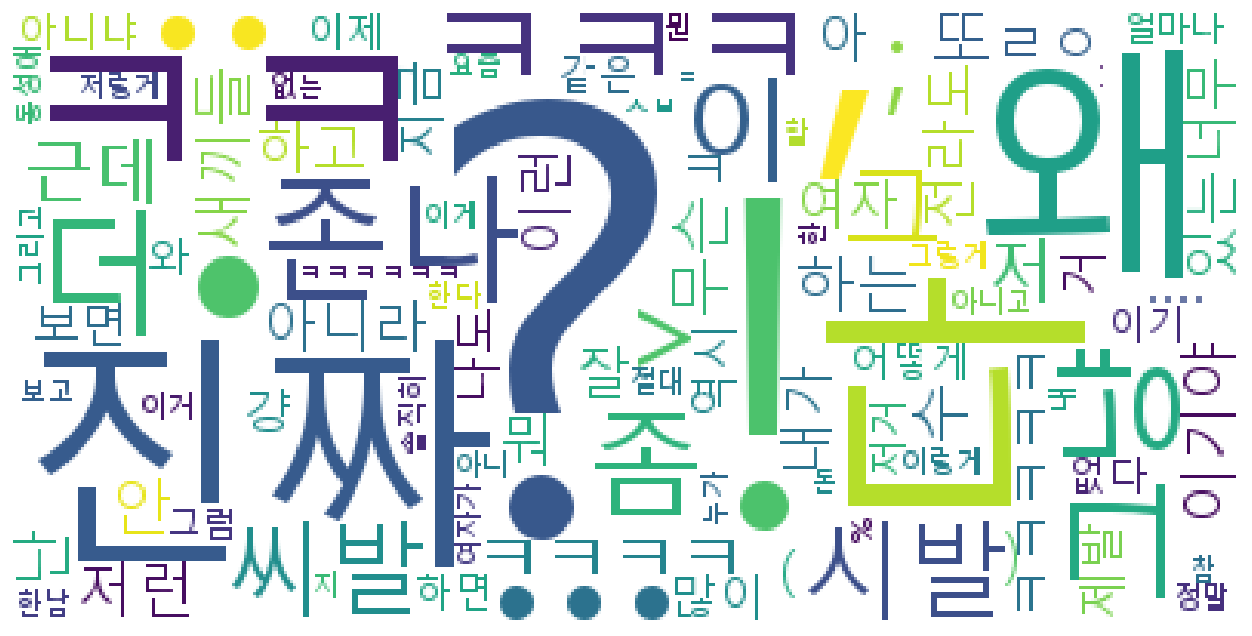

In [84]:
plt.figure(figsize=(20,8)) # 가로, 세로 비율 지정(인치 단위)
plt.imshow(wc_rs) # 그림을 시각화할때 사용하는 함수
plt.axis('off') # x,y 눈금 숨기기
plt.savefig("./한국어 혐오 단어 100.png") # 이미지 파일로 저장
plt.show() # 시각화 결과 보여주기

#### clean을 제외한 9가지 혐오표현중에서 한 가지를 골라 워드클라우드를 그려보자.

In [85]:
# 불리언 색인 방법
지역_혐오_text = train[train['지역']==1]['문장']
지역_혐오_text

6        예수 십새끼 개새끼 창녀아들 애비실종 가정교육 못받은 무뇌충 허언증 정신병자 사기꾼...
25                                    홍어무침 ㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋ
28                                            홍들 피들 폭들 ㅎㅎㅎ
35                                                 이새끼 전라도
37                                            진짜 전라도 존나 싫다
                               ...                        
14956                                               경상도새끼네
14975    7시말은 왜이렇게 듣기가 싫냐. 식당 같은데 가서도 전라도 말 들리면 신경 엄청 곤...
14979                      왜 재밌겠는데 뭘 섬라도 쪽 꿀잼뉴스 공중제비하고 보겠네
14998                                 전라디언은 뇌구조가 다르게 태어난당께
15001                                갱상도가아니라 홍어지 개좃같은 홍어년들
Name: 문장, Length: 1052, dtype: object

In [86]:
# 쪼개진 단어들이 들어갈 리스트
words = []
for text in tqdm(지역_혐오_text) :
    temp = word_tokenize(text) # 한 문장씩 토큰화
    words = words+temp

100%|██████████| 1052/1052 [00:00<00:00, 15622.52it/s]


In [87]:
len(words)

9735

In [88]:
counter = Counter(words) # 같은 단어의 갯수를 세준다
words_most_30 = counter.most_common(30)

In [89]:
# 단어빈도가 측정된 데이터로부터 워드클라우드 생성
# 입력데이터는 딕셔너리 형태로 집어 넣을것 (key:단어, value:빈도)
wc_rs = wc.generate_from_frequencies(dict(words_most_30))

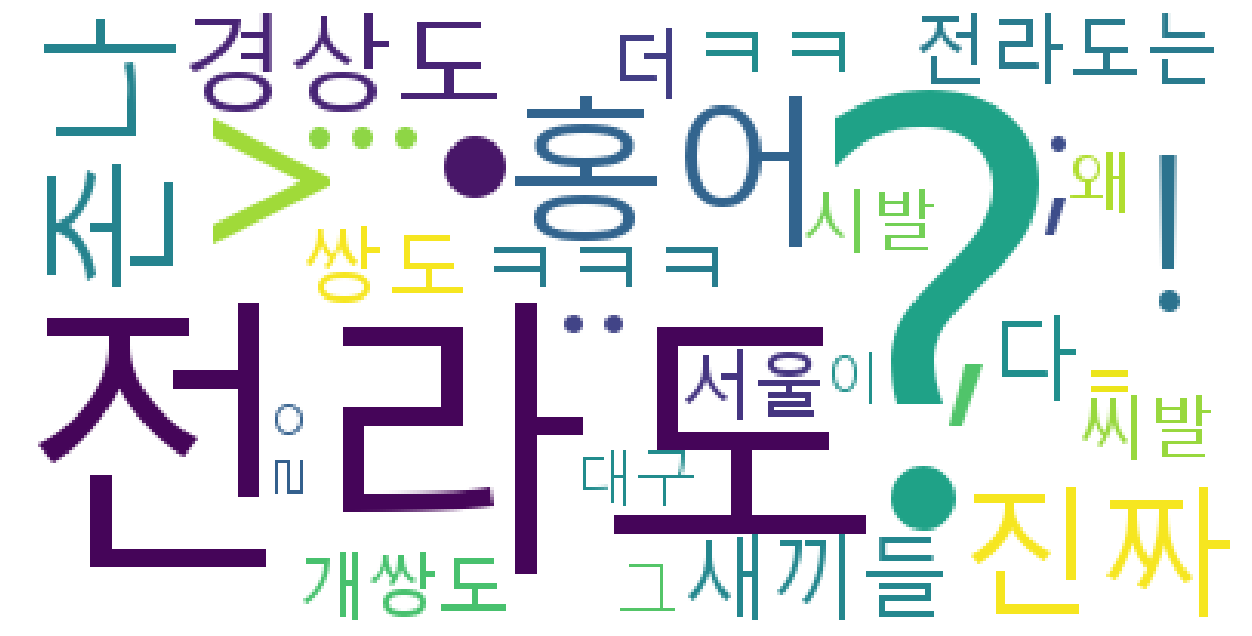

In [90]:
plt.figure(figsize=(20,8)) # 가로, 세로 비율 지정(인치 단위)
plt.imshow(wc_rs) # 그림을 시각화할때 사용하는 함수
plt.axis('off') # x,y 눈금 숨기기
plt.show() # 시각화 결과 보여주기

#### 전처리 : 텍스트데이터 클렌징
- 문장부호 제거
- 특정글자가 반복적으로 나타나는 단어토큰 제거 (ex : ㅋㅋ, ㅋㅋㅋ, ㅋㅋㅋㅋ)
- 한글자 단어 제거

##### 정규표현식(Regular Expression)
- 특정한 패턴(규칙)을 가진 문자열의 집합을 표현하는 언어
- 핸드폰 번호, 이메일 처럼 패턴이 있는 문자열의 검색과 치환을 위해 대부분의 프로그래밍 언어에서 지원하고 있다.
- https://wikidocs.net/21703

In [91]:
import re # 정규표현식을 사용할 수 있는 모듈 로딩

In [94]:
# 핸드폰번호 검출예시
# 1. 패턴생성
p = re.compile("010-?[0-9]{4}-?\\d{4}")
# 2. 검출
p.search('안녕하세요 저희 가게는 여기로 연락주세요. 핸드폰 번호는 010-1234-5678입니다.')

<re.Match object; span=(32, 45), match='010-1234-5678'>

In [95]:
p.search('전화번호 : 0101234-5678')

<re.Match object; span=(7, 19), match='0101234-5678'>

In [102]:
# 클렌징할 패턴 생성
unsmile_p = re.compile('[!?,.:;0-9a-zA-Zㅋㅎㄷㅇ~]+')

In [110]:
clean_words = []  # 클렌징된 단어토큰이 들어갈 리스트   
for w in words :
    if unsmile_p.search(w) : # 단어토큰이 패턴에 매칭된다면
        continue # 다음 단어 반복으로 넘어감
    if len(w) < 2 : # 한글자 단어라면
        continue # 다음 단어 반복으로 넘어감
    clean_words.append(w) # 패턴에 매칭되지 않는다면 리스트에 추가

In [111]:
counter = Counter(clean_words) # 같은 단어의 갯수를 세준다
words_most_30 = counter.most_common(30)
# 단어빈도가 측정된 데이터로부터 워드클라우드 생성
# 입력데이터는 딕셔너리 형태로 집어 넣을것 (key:단어, value:빈도)
wc_rs = wc.generate_from_frequencies(dict(words_most_30))

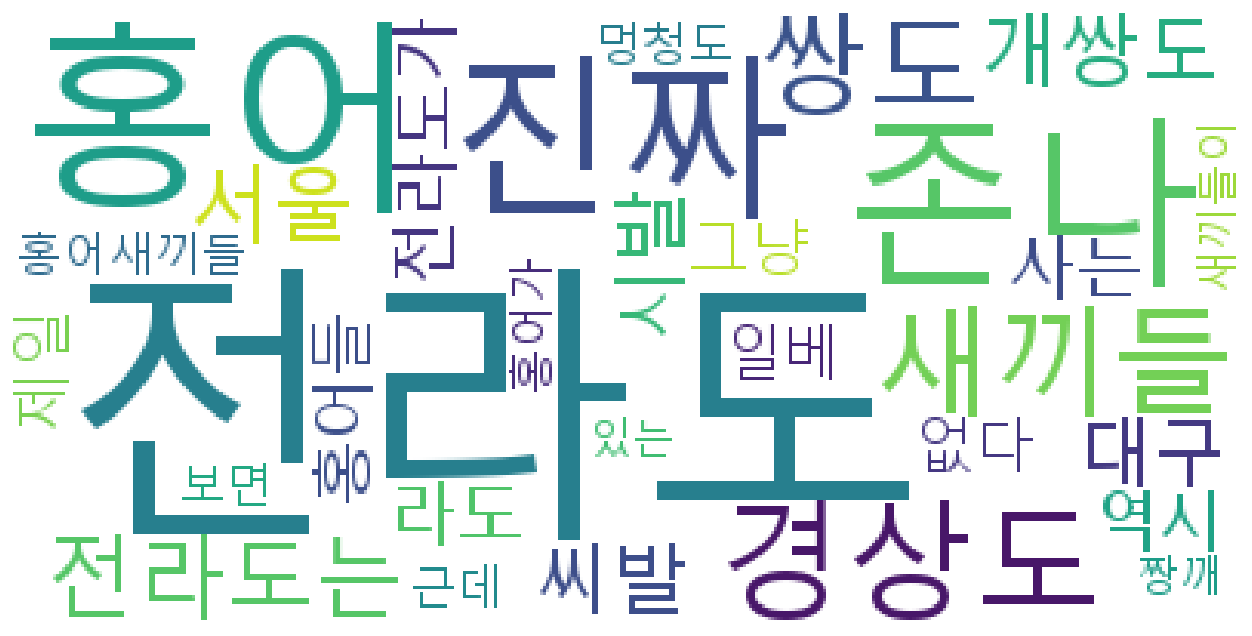

In [112]:
plt.figure(figsize=(20,8)) # 가로, 세로 비율 지정(인치 단위)
plt.imshow(wc_rs) # 그림을 시각화할때 사용하는 함수
plt.axis('off') # x,y 눈금 숨기기
plt.show() # 시각화 결과 보여주기